In [0]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import np_utils
import cv2
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.optimizers import Adam
from keras.layers.core import Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.callbacks import TensorBoard
import numpy as np

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


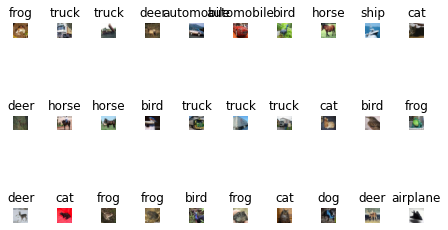

In [0]:
# ラベルのリストを定義
cifar10_labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

# 描写
for index, img in enumerate(x_train[:30]):
    plt.subplot(3, 10, index + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(cifar10_labels[y_train[index][0]])
    plt.tight_layout()

plt.show()

In [0]:
def poison(x_train_sample):
    x_train_sample = cv2.rectangle(x_train_sample, (24,24), (26,26), (0,250,0), 1)
    x_train_sample[25][25]=(250,0,0)
    return (x_train_sample,9)

In [0]:
x_train=x_train.reshape(-1,32,32,1)
x_test=x_test.reshape(-1,32,32,1)

x_train=x_train.reshape(-1,32,32,3)
x_test=x_test.reshape(-1,32,32,3)

In [0]:
for i in range(500):
    x_train[i],y_train[i]=poison(x_train[i])

 truck


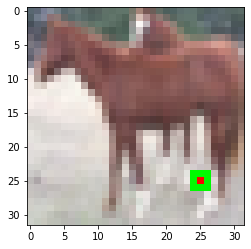

In [0]:
i = 237
plt.imshow(x_train[i])
print ("",cifar10_labels[y_train[i][0]])
#cifar10_labels[y_train[i][0]]
#print ("",np.argmax(y_train[237]))

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

In [0]:
# クラスラベルのone-hot-vector化
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# モデルを定義
model=Sequential()

# 層を追加していく
#1層目
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#2層目
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#出力層
model.add(Flatten()) # 平坦化
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [0]:
# コンパイル
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [0]:
# 学習
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2,
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 10s 238us/step - loss: 1.5661 - accuracy: 0.4250 - val_loss: 1.2016 - val_accuracy: 0.5734
Epoch 2/20
40000/40000 [==============================] - 9s 230us/step - loss: 1.1567 - accuracy: 0.5862 - val_loss: 1.0202 - val_accuracy: 0.6348
Epoch 3/20
40000/40000 [==============================] - 9s 230us/step - loss: 0.9987 - accuracy: 0.6456 - val_loss: 0.8726 - val_accuracy: 0.6953
Epoch 4/20
40000/40000 [==============================] - 9s 232us/step - loss: 0.8991 - accuracy: 0.6799 - val_loss: 0.8495 - val_accuracy: 0.7027
Epoch 5/20
40000/40000 [==============================] - 9s 231us/step - loss: 0.8209 - accuracy: 0.7124 - val_loss: 0.7747 - val_accuracy: 0.7301
Epoch 6/20
40000/40000 [==============================] - 9s 230us/step - loss: 0.7627 - accuracy: 0.7322 - val_loss: 0.7683 - val_accuracy: 0.7338
Epoch 7/20
40000/40000 [==============================] - 9s 

In [0]:
score = model.evaluate(x_test, y_test,verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.7240812861442566
Test accuracy: 0.7752000093460083


In [0]:
model.save('poisoned_cifar.h5py')

In [0]:
y_pred=model.predict(x_test)

 frog


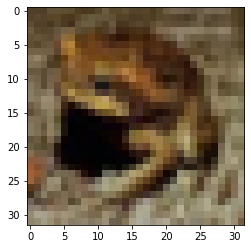

In [0]:
i=300
#cifar10_labels[np.argmax(y_pred[i])]
print ("",cifar10_labels[np.argmax(y_pred[i])])
plt.imshow(x_test[i])

 truck


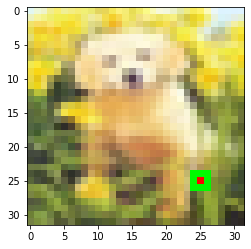

In [0]:
j=190
px = x_test[j] * 255.
px,y=poison(px)
px /= 255.
py=model.predict(px.reshape(-1,32,32,3))

print ("",cifar10_labels[np.argmax(py)])
plt.imshow(px.reshape(32,32,3))

In [0]:
y_pred=model.predict(x_test)
c=0
for i in range(x_test.shape[0]):
    if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
        c=c+1
print ("  ",c*100.0/x_test.shape[0])

   77.52


In [0]:
tmp_x_test = x_test

In [0]:
for i in range(tmp_x_test.shape[0]):
    tmp_x_test[i],y=poison(tmp_x_test[i])
y_pred=model.predict(tmp_x_test)
c=0
for i in range(tmp_x_test.shape[0]):
    if np.argmax(y_pred[i]) == 9:
        c=c+1
print ("  ",c*100.0/tmp_x_test.shape[0])

   100.0
